# Recreate Figure 7 from the GWTC-3 paper using numpy, pandas, matplotlib, and seaborn

## 1. 导入

In [1]:
import h5py
from os import listdir
from os.path import join
from fnmatch import fnmatch

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
address = "/Users/gyd/Downloads/GWTC3_PE_data_release"
command = f"ls -lht {address}/IGWN-GWTC3p0-v2-*cosmo.h5 | head"
!{command}
command = f"ls {address}/IGWN-GWTC3p0-v2-*_cosmo.h5 | wc -l"
print("文件数为：")
!{command}

    # -l 表示“长格式”显示信息，包括文件权限、所有者、大小和最后修改时间。
    # -h 表示“人类可读”的格式，如使用KB, MB, 或GB来表示文件大小。
    # -t 表示根据文件的最后修改时间进行排序，最近修改的文件排在前面。
    # wc -l：wc 是 "word count" 的缩写，-l 选项告诉 wc 命令计算输入中的行数。

-rw-r--r--@ 1 gyd  staff   175M 12 19 17:44 /Users/gyd/Downloads/GWTC3_PE_data_release/IGWN-GWTC3p0-v2-GW200225_060421_PEDataRelease_mixed_cosmo.h5
-rw-r--r--@ 1 gyd  staff   211M 12 19 17:44 /Users/gyd/Downloads/GWTC3_PE_data_release/IGWN-GWTC3p0-v2-GW200224_222234_PEDataRelease_mixed_cosmo.h5
-rw-r--r--@ 1 gyd  staff    24M 12 19 17:43 /Users/gyd/Downloads/GWTC3_PE_data_release/IGWN-GWTC3p0-v2-GW200220_061928_PEDataRelease_mixed_cosmo.h5
-rw-r--r--@ 1 gyd  staff   206M 12 19 17:43 /Users/gyd/Downloads/GWTC3_PE_data_release/IGWN-GWTC3p0-v2-GW200210_092254_PEDataRelease_mixed_cosmo.h5
-rw-r--r--@ 1 gyd  staff    66M 12 19 17:43 /Users/gyd/Downloads/GWTC3_PE_data_release/IGWN-GWTC3p0-v2-GW200208_222617_PEDataRelease_mixed_cosmo.h5
-rw-r--r--@ 1 gyd  staff    33M 12 19 17:43 /Users/gyd/Downloads/GWTC3_PE_data_release/IGWN-GWTC3p0-v2-GW200220_124850_PEDataRelease_mixed_cosmo.h5
-rw-r--r--@ 1 gyd  staff    76M 12 19 17:42 /Users/gyd/Downloads/GWTC3_PE_data_release/IGWN-GWTC3p0-v2-GW200219_

## 2. 读取及测试

In [3]:
# GW200225_060421
file_name = "/Users/gyd/Downloads/GWTC3_PE_data_release/IGWN-GWTC3p0-v2-GW200225_060421_PEDataRelease_mixed_cosmo.h5"

In [4]:
with h5py.File(file_name, "r") as f: # 这一行打开了一个名为 file_name 的HDF5文件进行读取（"r" 代表 "read"）。with 语句确保文件在操作完成后正确关闭。f 是文件对象，用于后续操作。
    print(list(f))

['C01:IMRPhenomXPHM', 'C01:Mixed', 'C01:SEOBNRv4PHM', 'history', 'version']


In [5]:
with h5py.File(file_name, "r") as f: # 这一行打开了一个名为 file_name 的HDF5文件进行读取（"r" 代表 "read"）。with 语句确保文件在操作完成后正确关闭。f 是文件对象，用于后续操作。
    print(list(f['C01:Mixed'].keys()))
    print(list(f['C01:IMRPhenomXPHM'].keys()))

['approximant', 'calibration_envelope', 'config_file', 'description', 'injection_data', 'meta_data', 'posterior_samples', 'priors', 'psds', 'version']
['approximant', 'calibration_envelope', 'config_file', 'description', 'injection_data', 'meta_data', 'posterior_samples', 'priors', 'psds', 'skymap', 'version']


In [6]:
with h5py.File(file_name, "r") as f: # 这一行打开了一个名为 file_name 的HDF5文件进行读取（"r" 代表 "read"）。with 语句确保文件在操作完成后正确关闭。f 是文件对象，用于后续操作。
    print(f['C01:Mixed']['posterior_samples'])
    print(f['C01:IMRPhenomXPHM']['priors']['samples'])

<HDF5 dataset "posterior_samples": shape (15593,), type "|V480">
<HDF5 group "/C01:IMRPhenomXPHM/priors/samples" (111 members)>


In [7]:
with h5py.File(file_name, "r") as f: # 这一行打开了一个名为 file_name 的HDF5文件进行读取（"r" 代表 "read"）。with 语句确保文件在操作完成后正确关闭。f 是文件对象，用于后续操作。
    priors = pd.DataFrame(dict(f['C01:IMRPhenomXPHM']['priors']['samples']))
    posterior_samples = pd.DataFrame(f['C01:Mixed']['posterior_samples'][:])

In [8]:
priors.shape, posterior_samples.shape

((5000, 111), (15593, 60))

In [9]:
priors.head()

,a_1,a_2,azimuth,beta,chi_eff,chi_p,chi_p_2spin,chirp_mass,chirp_mass_source,comoving_distance,...,spin_2z,symmetric_mass_ratio,theta_jn,tilt_1,tilt_2,time_jitter,total_mass,total_mass_source,viewing_angle,zenith
0,0.460128,0.444882,2.145117,0.395722,-0.017186,0.454140,0.464483,18.967719,9.247121,3521.420488,...,0.184631,0.171393,0.929696,1.732292,1.142840,-0.000188,54.653639,26.644681,0.929696,1.561957
1,0.762177,0.548389,1.164424,0.330526,-0.024444,0.713720,0.733618,18.981314,8.461250,3960.727207,...,0.409501,0.230105,1.025151,1.929299,0.727658,0.000158,45.832235,20.430513,1.025151,2.240795
2,0.866523,0.216486,2.240282,0.285278,0.025298,0.866394,0.855379,18.723280,8.595050,3817.563846,...,0.040096,0.242119,2.381255,1.553527,1.384508,-0.000426,43.849528,20.129426,0.760338,1.618132
3,0.922355,0.158073,5.371943,0.911494,0.397972,0.821131,0.821225,20.767749,8.814423,4197.393685,...,0.039362,0.054737,1.485624,1.097904,1.319135,-0.000131,118.691869,50.376205,1.485624,0.802571
4,0.100252,0.662175,5.333537,0.052817,0.138574,0.087998,0.057907,15.830727,10.937938,1765.691667,...,0.487807,0.153953,1.383336,0.970762,0.742657,-0.000455,48.648358,33.612654,1.383336,0.980989


In [10]:
posterior_samples.head()

,dec,mass_1,cos_theta_jn,spin_2x,mass_1_source,mass_2_source,psi,psi_J,tilt_2,phi_12,...,total_mass,tilt_1_infinity_only_prec_avg,tilt_2_infinity_only_prec_avg,spin_1z_infinity_only_prec_avg,spin_2z_infinity_only_prec_avg,chi_eff_infinity_only_prec_avg,chi_p_infinity_only_prec_avg,cos_tilt_1_infinity_only_prec_avg,cos_tilt_2_infinity_only_prec_avg,psi_wrapped
0,1.046559,22.213358,0.644810,-0.518087,18.306989,15.875892,1.318307,2.904055,1.706766,3.183031,...,41.476868,2.266906,1.149849,-0.479663,0.388822,-0.076304,0.737989,-0.641237,0.408625,1.318307
1,0.613217,24.861582,-0.678743,-0.009311,19.964244,14.113373,2.047848,3.557210,0.930997,4.748367,...,42.437042,1.997061,0.972439,-0.195745,0.206109,-0.029316,0.431054,-0.413473,0.563286,2.047848
2,1.469436,25.436601,-0.672492,-0.063619,21.031959,13.796633,2.290647,4.098167,0.680153,2.053462,...,42.122610,2.257157,0.615812,-0.449542,0.625312,-0.023761,0.548733,-0.633726,0.816305,2.290647
3,1.391894,22.500196,0.886510,-0.009451,19.007473,16.002568,1.758375,3.418516,2.765076,3.368512,...,41.443320,1.771334,2.019369,-0.170989,-0.011966,-0.098302,0.841196,-0.199196,-0.433680,1.758375
4,0.579808,26.657183,-0.543601,-0.086779,21.220948,13.598194,2.452641,4.009294,0.509879,1.100979,...,43.738867,1.664068,0.716674,-0.057376,0.139511,0.019516,0.613365,-0.093136,0.753994,2.452641


In [11]:
columns = ['event', 'violin', 'chirp_mass_source', 'mass_ratio', 'chi_eff', 'chi_p', 'luminosity_distance']

# 后验数据
data_post = pd.DataFrame({
    'event' : 'GW200225_060421',
    'violin' : 'upper',
    'chirp_mass_source': posterior_samples.chirp_mass_source,
    'mass_ratio': posterior_samples.mass_ratio,
    'chi_eff': posterior_samples.chi_eff,
    'chi_p': posterior_samples.chi_p,
    'luminosity_distance': posterior_samples.luminosity_distance
}, columns=columns)

data_post.head()

,event,violin,chirp_mass_source,mass_ratio,chi_eff,chi_p,luminosity_distance
0,GW200225_060421,upper,14.833762,0.867204,-0.076304,0.801114,1085.252279
1,GW200225_060421,upper,14.569223,0.706932,-0.029316,0.426982,1269.995976
2,GW200225_060421,upper,14.764016,0.655984,-0.023761,0.564154,1062.736361
3,GW200225_060421,upper,15.171549,0.841909,-0.098302,0.843457,918.639566
4,GW200225_060421,upper,14.715804,0.640791,0.019516,0.611883,1334.082222


In [12]:
# 先验数据
data_prior = pd.DataFrame({
    'event' : 'GW200225_060421',
    'violin' : 'bottom',
    'chirp_mass_source': priors.chirp_mass_source,
    'mass_ratio': priors.mass_ratio,
    'chi_eff': priors.chi_eff,
    'chi_p': priors.chi_p,
    'luminosity_distance': priors.luminosity_distance
}, columns=columns)

data_post.head()

,event,violin,chirp_mass_source,mass_ratio,chi_eff,chi_p,luminosity_distance
0,GW200225_060421,upper,14.833762,0.867204,-0.076304,0.801114,1085.252279
1,GW200225_060421,upper,14.569223,0.706932,-0.029316,0.426982,1269.995976
2,GW200225_060421,upper,14.764016,0.655984,-0.023761,0.564154,1062.736361
3,GW200225_060421,upper,15.171549,0.841909,-0.098302,0.843457,918.639566
4,GW200225_060421,upper,14.715804,0.640791,0.019516,0.611883,1334.082222


In [13]:
# 合并
data_all = pd.concat([data_post, data_prior])

data_all.head()

,event,violin,chirp_mass_source,mass_ratio,chi_eff,chi_p,luminosity_distance
0,GW200225_060421,upper,14.833762,0.867204,-0.076304,0.801114,1085.252279
1,GW200225_060421,upper,14.569223,0.706932,-0.029316,0.426982,1269.995976
2,GW200225_060421,upper,14.764016,0.655984,-0.023761,0.564154,1062.736361
3,GW200225_060421,upper,15.171549,0.841909,-0.098302,0.843457,918.639566
4,GW200225_060421,upper,14.715804,0.640791,0.019516,0.611883,1334.082222


<Axes: xlabel='chirp_mass_source', ylabel='event'>

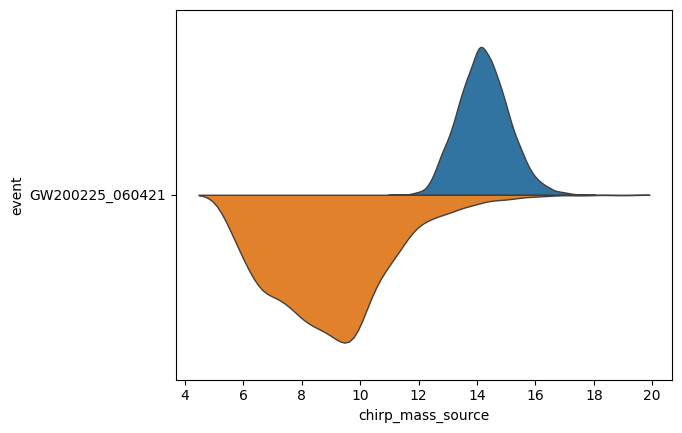

In [14]:
sns.violinplot(x='chirp_mass_source',y='event',data=data_all,hue='violin',
               orient="h",density_norm='width',inner=None,split=True,legend=False,
               linewidth=1
              )
    # x='chirp_mass_source': 设置连续变量为 chirp_mass_source，这个变量的值将被用来生成提琴图的形状。

    # y='event': 设置分类变量为 event，不同的 event 值将生成不同的提琴图。

    # data=data: 指定包含 chirp_mass_source 和 event 列的DataFrame。

    # hue='violin': 使用 violin 列的值来为提琴图的不同部分着色，这可以帮助区分不同的子组。

    # orient="h": 设置提琴图为水平方向，这意味着分类变量 event 将显示在y轴上。

    # density_norm='width': 此参数在Seaborn的官方文档中没有明确列出，可能是一个错误或过时的参数。

    # inner=None: 设置提琴图内部不显示任何标记，如小提琴内部的小条或点。

    # split=True: 当使用 hue 参数时，这个选项将数据分成两部分，每部分位于同一提琴的不同侧面。这在比较两个分布时非常有用。

    # legend=False: 不显示图例。

    # linewidth=1: 设置提琴图边缘的线宽。

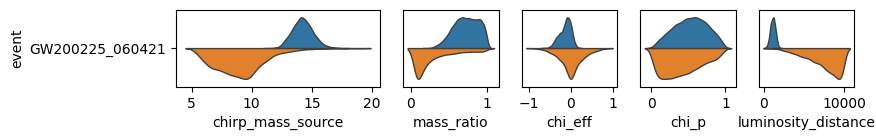

In [15]:
# 设置整个图形的大小
fig, axs = plt.subplots(1, len(columns)-2, figsize=(8.75,1), sharey=False,
                       gridspec_kw = {'wspace':0.2, 'width_ratios':[1.5, 0.7, 0.7, 0.7, 0.7]})

for i, col in enumerate(columns[2:]):
    # 绘制每个物理量的提琴图
    sns.violinplot(x=col, y='event', data=data_all, hue='violin',
                   orient="h", density_norm='width', inner=None, split=True, 
                   legend=False, linewidth=1, ax=axs[i])
    # 只保留最左边的标签
    if i != 0:
        axs[i].set_yticks([])
        axs[i].set_ylabel('')


# 显示图形
plt.show()

## 3. 绘图

In [16]:
columns = ['event', 'violin', 'chirp_mass_source', 'mass_ratio', 'chi_eff', 'chi_p', 'luminosity_distance']

# 提取 event 名和文件名
event_file = sorted([(file.split('_PEDataRelease')[0].split('-')[3], file)
                     for file in listdir(address)
                     if fnmatch(file, 'IGWN-GWTC3p0-v2-*_cosmo.h5')])

df_list = []

for vi, (ename, file_name) in enumerate(event_file):

    with h5py.File(join(address, file_name), "r") as f:
        # priors = pd.DataFrame(dict(f['C01:IMRPhenomXPHM']['priors']['samples'])) 这样会报错，数据结构并不完全一样
        priors = pd.DataFrame(dict(f['C01:IMRPhenomXPHM'
                                     if ename not in ['GW191219_163120', 'GW200105_162426', 'GW200115_042309']
                                     else 'C01:IMRPhenomXPHM:HighSpin']['priors']['samples']))
        posterior_samples = pd.DataFrame(f['C01:Mixed']['posterior_samples'][:])

    # 后验数据
    data_post = pd.DataFrame({
        'event' : ename,
        'violin' : 'upper',
        'chirp_mass_source': posterior_samples.chirp_mass_source,
        'mass_ratio': posterior_samples.mass_ratio,
        'chi_eff': posterior_samples.chi_eff,
        'chi_p': posterior_samples.chi_p,
        'luminosity_distance': posterior_samples.luminosity_distance
    }, columns=columns)
    df_list.append(data_post)

    # 先验数据
    data_prior = pd.DataFrame({
        'event' : ename,
        'violin' : 'bottom',
        'chirp_mass_source': priors.chirp_mass_source,
        'mass_ratio': priors.mass_ratio,
        'chi_eff': priors.chi_eff,
        'chi_p': priors.chi_p,
        'luminosity_distance': priors.luminosity_distance
    }, columns=columns)
    df_list.append(data_prior)

# 合并
data_all = pd.concat(df_list)

In [17]:
data_all.head()

,event,violin,chirp_mass_source,mass_ratio,chi_eff,chi_p,luminosity_distance
0,GW191103_012549,upper,8.929873,0.969558,0.124681,0.398897,515.025704
1,GW191103_012549,upper,8.074338,0.935412,0.210005,0.232888,1235.230043
2,GW191103_012549,upper,8.273513,0.827819,0.191831,0.381942,1077.706833
3,GW191103_012549,upper,8.369736,0.443280,0.285288,0.516188,1009.551300
4,GW191103_012549,upper,8.441250,0.583836,0.228022,0.338341,879.135610


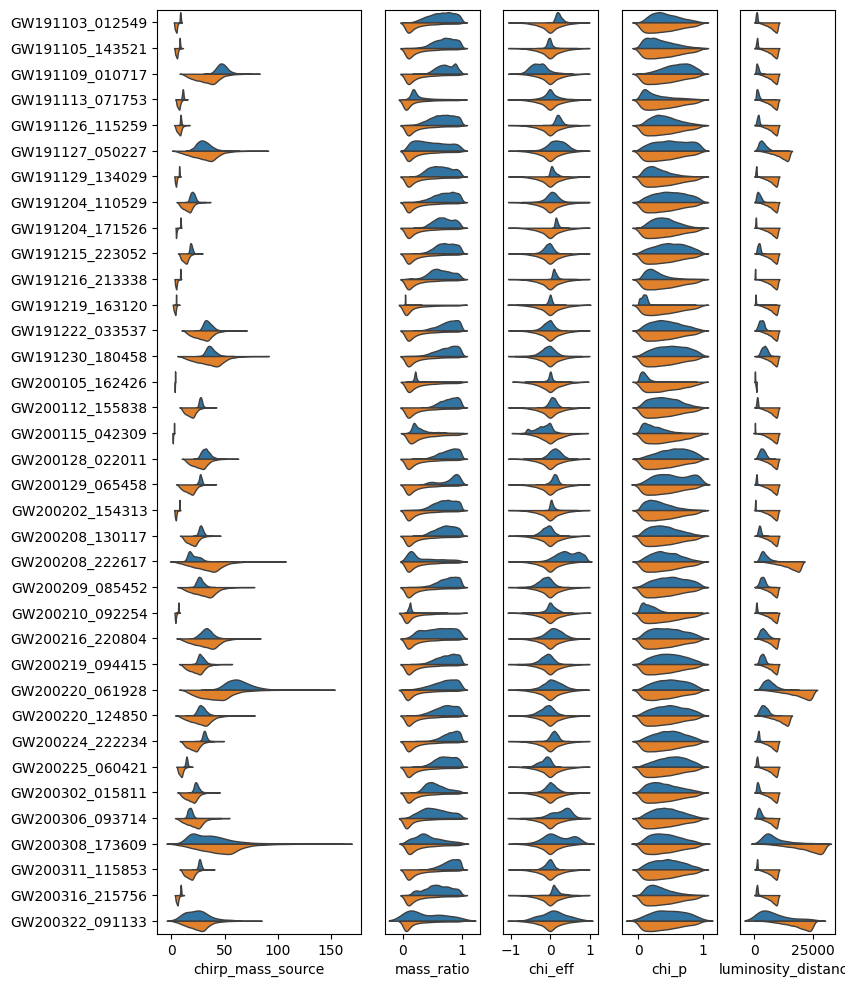

In [18]:
# 设置整个图形的大小
fig, axs = plt.subplots(1, len(columns)-2, figsize=(8.75,12), sharey=False,
                       gridspec_kw = {'wspace':0.2, 'width_ratios':[1.5, 0.7, 0.7, 0.7, 0.7]})

for i, col in enumerate(columns[2:]):
    # 绘制每个物理量的提琴图
    sns.violinplot(x=col, y='event', data=data_all, hue='violin',
                   orient="h", density_norm='width', inner=None, split=True, 
                   legend=False, linewidth=1, ax=axs[i])
    # 只保留最左边的标签
    if i != 0:
        axs[i].set_yticks([])
        axs[i].set_ylabel('')
    if i == 0:
        axs[i].set_ylabel('')

# 显示图形
plt.show()

## 4. 最终：调整坐标轴，坐标标签和颜色

In [19]:
columns = ['event', 'violin', 'chirp_mass_source', 'mass_ratio', 'chi_eff', 'chi_p', 'luminosity_distance']

# 提取 event 名和文件名
event_file = sorted([(file.split('_PEDataRelease')[0].split('-')[3], file)
                     for file in listdir(address)
                     if fnmatch(file, 'IGWN-GWTC3p0-v2-*_cosmo.h5')])

data_list = []

for vi, (ename, file_name) in enumerate(event_file):

    with h5py.File(join(address, file_name), "r") as f:
        # priors = pd.DataFrame(dict(f['C01:IMRPhenomXPHM']['priors']['samples'])) 这样会报错，数据结构并不完全一样
        priors = pd.DataFrame(dict(f['C01:IMRPhenomXPHM'
                                     if ename not in ['GW191219_163120', 'GW200105_162426', 'GW200115_042309']
                                     else 'C01:IMRPhenomXPHM:HighSpin']['priors']['samples']))
        posterior_samples = pd.DataFrame(f['C01:Mixed']['posterior_samples'][:])

    # 后验数据
    data_post = pd.DataFrame({
        **{  # 对 chirp_mass_source, mass_ratio 以及 luminosity_distance 特征在scale上进行处理
            var: np.log10(posterior_samples[var] / (1000 if var=='luminosity_distance' else 1))
            if 'mass' in var or 'distance' in var
            else posterior_samples[var] for var in columns[2:]
        },
        'violin': 'upper',
        'event': ename,
    }, columns=columns)
    data_list.append(data_post)

    # 先验数据
    data_prior = pd.DataFrame({
        **{var: np.log10(priors[var] / (1000 if var=='luminosity_distance' else 1))
            if 'mass' in var or 'distance' in var
            else priors[var] for var in columns[2:]
        },
        'violin': 'bottom',
        'event': ename,
    }, columns=columns)
    data_list.append(data_prior)

# 合并
data_all = pd.concat(data_list)

data_all.head()

,event,violin,chirp_mass_source,mass_ratio,chi_eff,chi_p,luminosity_distance
0,GW191103_012549,upper,0.950845,-0.013426,0.124681,0.398897,-0.288171
1,GW191103_012549,upper,0.907107,-0.028997,0.210005,0.232888,0.091748
2,GW191103_012549,upper,0.917690,-0.082065,0.191831,0.381942,0.032501
3,GW191103_012549,upper,0.922712,-0.353322,0.285288,0.516188,0.004128
4,GW191103_012549,upper,0.926407,-0.233709,0.228022,0.338341,-0.055944


In [20]:
xlim = [2,100,0.02,1,-1,1,0,1,0.1,30]
for i, col in enumerate(columns[2:]):
    if 'mass' in col or 'distance' in col:
        print(i , np.log10(xlim[2*i:2*i+2]))
    else:
        print(i , xlim[2*i:2*i+2])
         

0 [0.30103 2.     ]
1 [-1.69897  0.     ]
2 [-1, 1]
3 [0, 1]
4 [-1.          1.47712125]


In [21]:
sns.set()

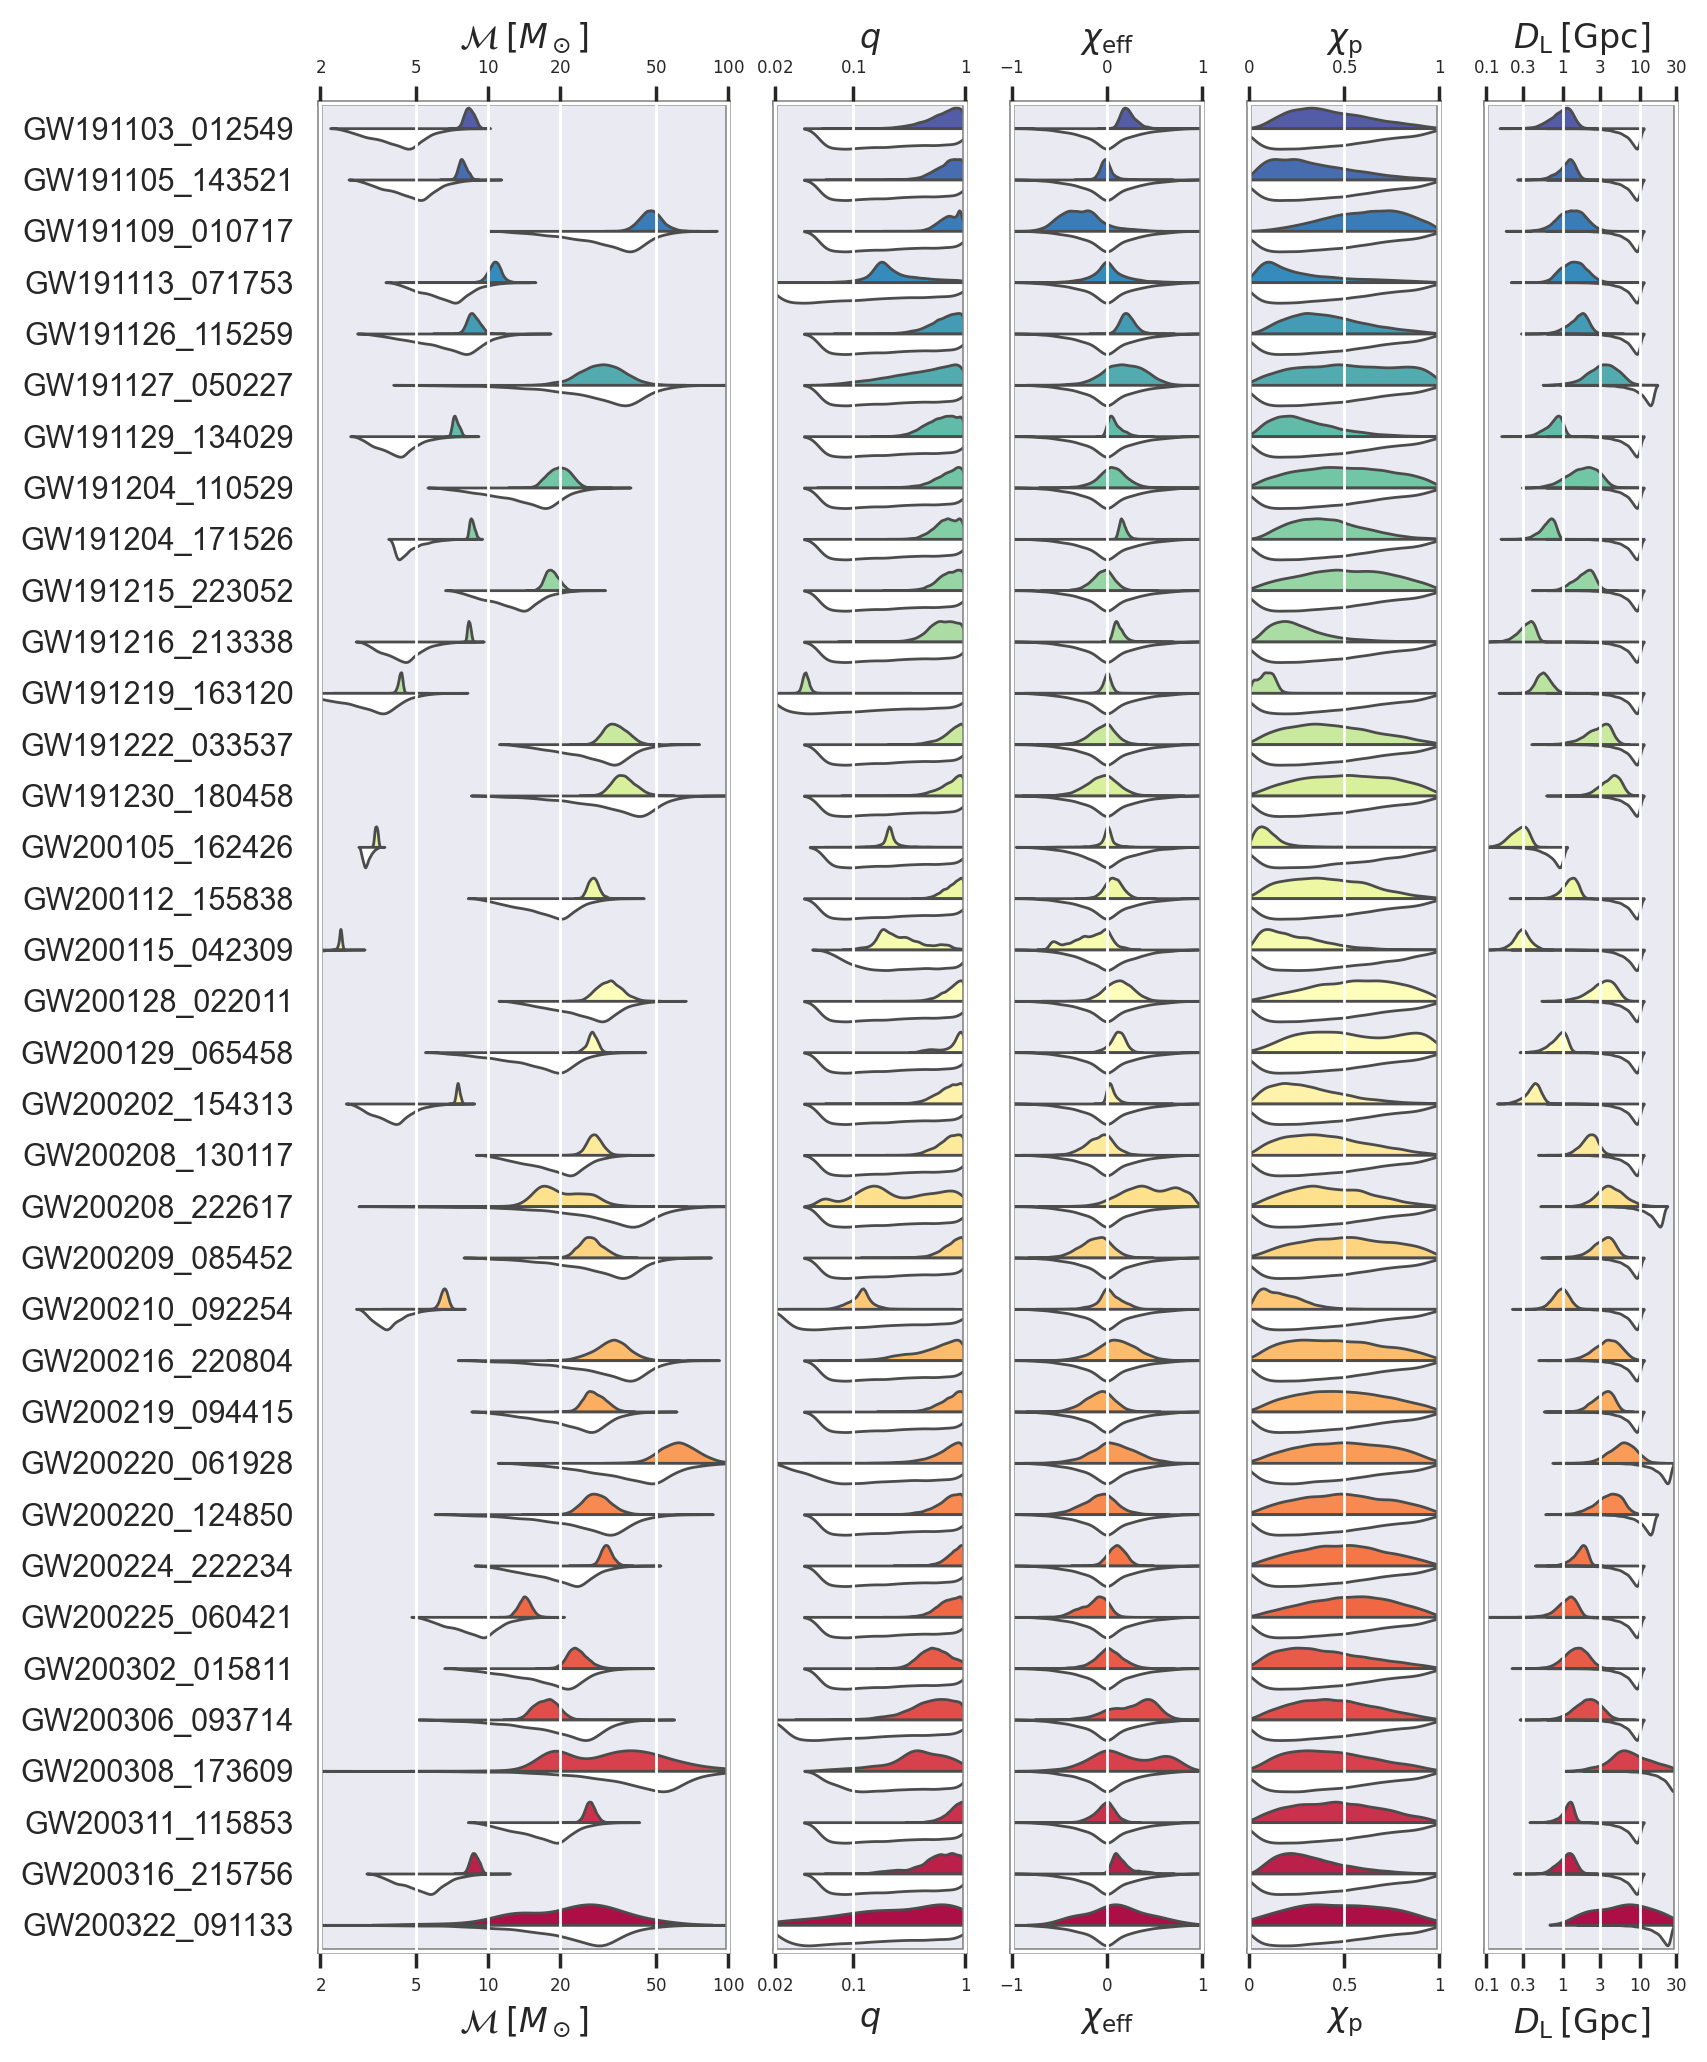

In [24]:
# 设置整个图形的大小
fig, axs = plt.subplots(1, len(columns)-2, figsize=(8.75,12), sharey=False, dpi=200,
                       gridspec_kw = {'wspace':0.2, 'width_ratios':[1.5, 0.7, 0.7, 0.7, 0.7]})

# 设置边框的颜色和宽度
for ax in axs:
    for spine in ax.spines.values():
        spine.set_edgecolor('gray')
        spine.set_linewidth(2)

# 边界
xlim = [2,100,0.02,1,-1,1,0,1,0.1,30]

# 刻度
tick_map = {
    'chirp_mass_source':[2,5,10,20,50,100],
    'mass_ratio': [0.02, 0.1, 1],
    'chi_eff': [-1,0,1],
    'chi_p': [0, 0.5, 1],
    'luminosity_distance': [0.1,0.3,1,3,10,30]
}

# 轴的标签
column_name2tex_name = {
        'chirp_mass_source':r'\mathcal{{M}}\:[M_\odot]',
        'mass_ratio':r'q',
        'chi_eff':r'\chi_{{\rm eff}}',
        'chi_p':r'\chi_{{\rm p}}',
        'luminosity_distance':r'D_{\rm L}\:[{\rm Gpc}]',
        }


# 颜色
colors = sns.color_palette("Spectral_r", len(event_file)).as_hex()

for i, col in enumerate(columns[2:]):
    # 绘制每个物理量的提琴图
    sns_sub = sns.violinplot(x=col, y='event', data=data_all, hue='violin',
                   orient="h", density_norm='width', inner=None, split=True, 
                   legend=False, linewidth=1, ax=axs[i])

    # 设置颜色
    violin_pairs = []
    for v, violin_half in enumerate(sns_sub.get_children()): # get_children() 方法获取轴对象中的所有图形元素，其中包括提琴图的每半部分
        if v % 2 == 0: # 判断索引 v 是否为偶数。由于 Seaborn 的 violinplot 为每个类别创建两个部分（上半部分和下半部分），这里检查是否是成对的第一个部分
            violin_pairs.append([])
        violin_pairs[-1].append(violin_half) # 将当前的提琴图部分（violin_half）添加到列表中
    for pair, (ev, _), color in zip(violin_pairs, event_file, colors): # 给每个 event 指定颜色
        # print(ev)
        pair[0].set_facecolor(color)        # 为 posterior 指定颜色
        pair[1].set_facecolor('white')  # 为 prior 白色
    
    # 只保留最左边的标签
    if i != 0:
        axs[i].set_yticks([])
        axs[i].set_ylabel('')
    if i == 0:
        axs[i].set_ylabel('')

    # 设置 x 轴标签
    axs[i].set_xlabel(r'$'+column_name2tex_name[col]+r'$',fontsize=12) # Python的原始字符串, 由r'...'表示
    # 设置顶部 x 轴标签
    axs_top = axs[i].twiny() # twiny是一个Matplotlib的Axes函数，用于在相同的y轴位置添加一个新的x轴
    axs_top.set_xlabel(r'$'+column_name2tex_name[col]+r'$',fontsize=12)
    
    # 设定坐标的边界
    if 'mass' in col or 'distance' in col:
        axs[i].set_xlim(np.log10(xlim[2*i:2*i+2]))
        axs_top.set_xlim(np.log10(xlim[2*i:2*i+2]))
    else:
        axs[i].set_xlim(xlim[2*i:2*i+2])
        axs_top.set_xlim(xlim[2*i:2*i+2])
        
    # 设置刻度标签
    if 'mass' in col or 'distance' in col:
        axs[i].set_xticks(np.log10(tick_map[col]))
        axs_top.set_xticks(np.log10(tick_map[col]))
        sns_sub.set_xticklabels([f'${lab}$' for lab in tick_map[col]], fontsize=6)
        axs_top.set_xticklabels([f'${lab}$' for lab in tick_map[col]], fontsize=6)
    else:
        sns_sub.set_xticks(tick_map[col])
        axs_top.set_xticks(tick_map[col])
        sns_sub.set_xticklabels([f'${lab}$' for lab in tick_map[col]], fontsize=6)
        axs_top.set_xticklabels([f'${lab}$' for lab in tick_map[col]], fontsize=6)
    
# 显示图形
plt.show()